In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'C:\Users\E\Desktop\iris (1).xls')

In [3]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [5]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [ ]:
#FINDING THE NULL VALUES

In [6]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [ ]:
#Remove all the null values

In [7]:
for i in['SL', 'SW', 'PL']:
    data[i]=data[i].fillna(data[i].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [ ]:
# Label Encoding

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [11]:
data['Classification']=le.fit_transform(data['Classification'])

In [12]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.40,0.2,0
1,4.9,3.0,1.40,0.2,0
2,5.8,3.2,1.30,0.2,0
3,4.6,3.1,1.50,0.2,0
4,5.0,3.6,1.40,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.20,2.3,2
146,6.3,2.5,5.00,1.9,2
147,6.5,3.0,4.35,2.0,2
148,6.2,3.4,5.40,2.3,2


<AxesSubplot:>

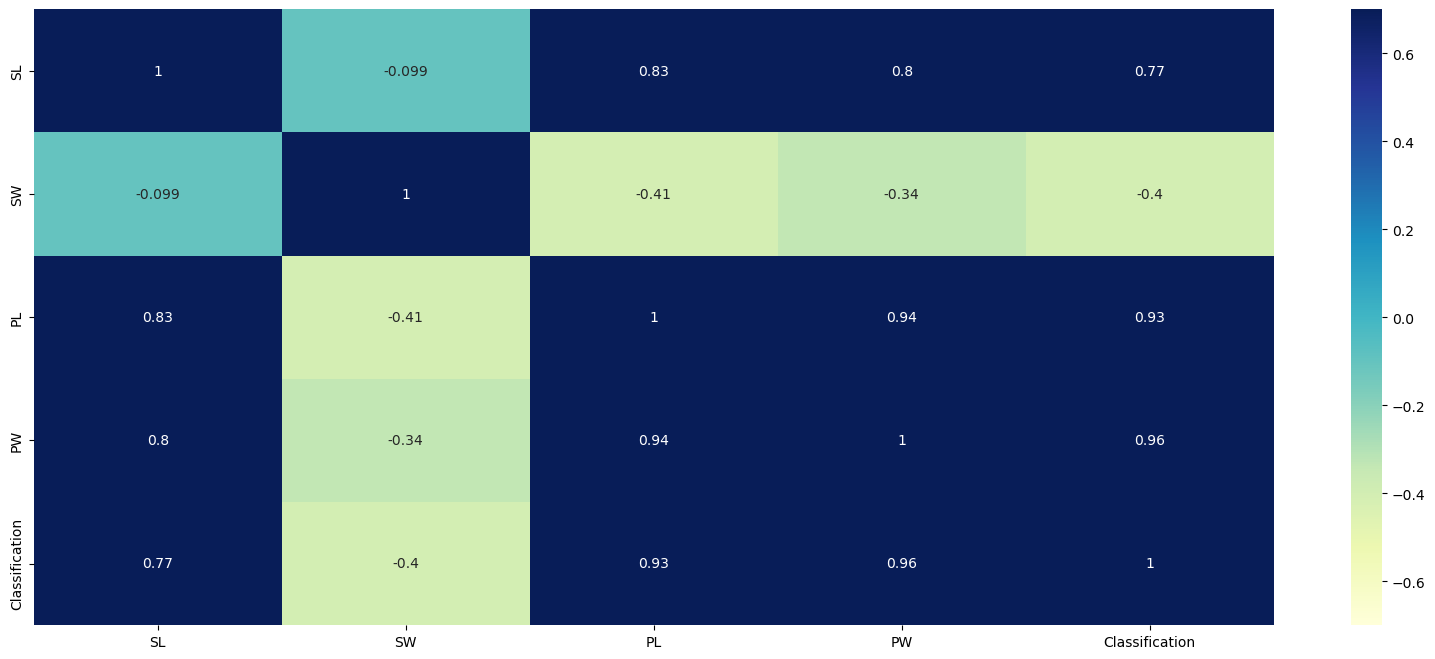

In [67]:
corrmatrix=data.corr()
plt.subplots(figsize=(20,8))
sns.heatmap(corrmatrix,vmax=0.7,vmin=-0.7,annot=True,cmap='YlGnBu')

In [13]:
#LINEAR REGRESSION
y=data['Classification']
x=data.drop(['Classification'],axis=1)

In [14]:
y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Classification, Length: 150, dtype: int32

In [15]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model=lr.fit(x_train,y_train)
y_pred=model.predict(x_test)

In [17]:
y_pred

array([ 1.14183548, -0.01898763,  2.2845642 ,  1.33742959,  1.33143107,
        0.10552649,  1.08961535,  1.97102196,  1.47382581,  1.08110216,
        1.7422777 , -0.08488136, -0.0831443 , -0.09127674, -0.05716713,
        1.33935702,  1.99588276,  1.0328196 ,  1.18890891,  2.0121735 ,
       -0.02991908,  1.59156258,  0.10011641,  1.93392053,  1.79203395,
        2.02959674,  1.78229674,  2.05625511,  0.07162458, -0.00793393])

In [18]:
from sklearn.metrics import mean_squared_error,r2_score

In [19]:
print('MSE is:',mean_squared_error(y_test,y_pred))

MSE is: 0.03674897628057208


In [20]:
print('R Squared value is:',r2_score(y_test,y_pred))

R Squared value is: 0.9474179989626155


In [21]:
#LOGISTIC REGRESSION

In [22]:
from sklearn.linear_model import LogisticRegression

In [29]:
log_reg=LogisticRegression()
model1=log_reg.fit(x_train,y_train)
y_pred=model1.predict(x_test)

C:\Users\E\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [30]:
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0])

In [31]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,f1_score,accuracy_score

In [32]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


In [41]:
print(accuracy_score(y_test,y_pred))

1.0


In [63]:
print(precision_score(y_test,y_pred,pos_label='positive',average='micro'))

1.0


C:\Users\E\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [35]:
#KNN MODEL

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric_k= []
neighbors = np.arange(3,15)

for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    model2=knn.fit(x_train,y_train)
    y_pred_knn=model2.predict(x_test)
    acc=accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to Tr

In [36]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

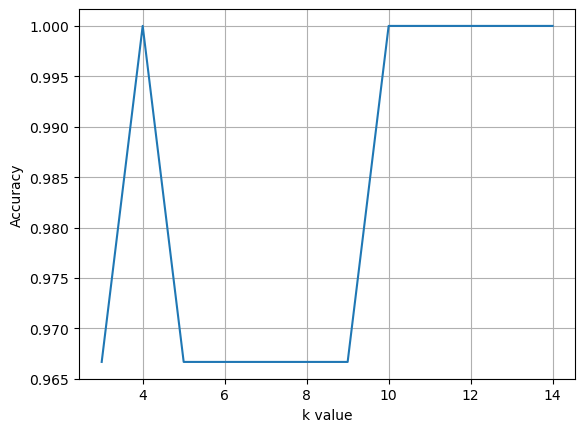

In [37]:
plt.plot(neighbors, metric_k)
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.grid()

In [69]:
knn= KNeighborsClassifier(n_neighbors=4)
model2= knn.fit(x_train, y_train)
y_pred_knn= model2.predict(x_test)

C:\Users\E\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [70]:
print(confusion_matrix(y_test,y_pred_knn))
print(accuracy_score(y_test,y_pred_knn))
print(precision_score(y_test,y_pred_knn,pos_label='positive',average='micro'))
print(recall_score(y_test,y_pred_knn,pos_label='positive',average='micro'))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
1.0
1.0
1.0


C:\Users\E\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(
C:\Users\E\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1370: UserWarning: Note that pos_label (set to 'positive') is ignored when average != 'binary' (got 'micro'). You may use labels=[pos_label] to specify a single positive class.
  warnings.warn(


In [71]:
#SVM model
from sklearn.svm import SVC

In [72]:
svm_clf = SVC(kernel='rbf')

In [73]:
svm_clf.fit(x_train,y_train)

SVC()

In [74]:
y_pred=svm_clf.predict(x_test)

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [76]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [77]:
accuracy_score(y_test,y_pred)

1.0

In [49]:
#Decision Trees
from sklearn.tree import DecisionTreeClassifier

In [50]:
dt_clf=DecisionTreeClassifier(random_state=42)

In [51]:
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [52]:
y_pred=dt_clf.predict(x_test)

In [53]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [54]:
accuracy_score(y_test,y_pred)

1.0

In [55]:
#Random Forest

In [56]:
from sklearn.ensemble import RandomForestClassifier


In [57]:
rf_clf=RandomForestClassifier()

In [58]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [60]:
y_pred=rf_clf.predict(x_test)

In [61]:
confusion_matrix(y_test,y_pred)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [62]:
accuracy_score(y_test,y_pred)

1.0

Linear regression=0.9474179989626155
Logistic Regression=1.0
Knn model=1.0
SVM model rbf=1.0
Decision Tree=1.0
Random Forest=1.0

In [ ]:
#Except LINEAR REGRESSION all other classifications showing same value